# R-CNN Implementation Using Keras

Step 1: read in dataset and draw bounding boxes on images

                                            filename  width  height   class  \
0  d66fe3c0f7d5a396_jpg.rf.0d947e33ef400474603dc7...    416     416    Crab   
1  b8d029497cf7bac6_jpg.rf.0180374b736435cd50e82b...    416     416  Shrimp   
2  b8d029497cf7bac6_jpg.rf.0180374b736435cd50e82b...    416     416  Shrimp   
3  faa591da3ab1fa90_jpg.rf.0b5cc08196694e1f25b4b0...    416     416  Shrimp   
4  faa591da3ab1fa90_jpg.rf.0b5cc08196694e1f25b4b0...    416     416  Shrimp   

   xmin  ymin  xmax  ymax  
0   148   115   384   302  
1   101     3   164   134  
2   246   112   366   323  
3     0   276   167   415  
4     6    27   138   143  
filename    d66fe3c0f7d5a396_jpg.rf.0d947e33ef400474603dc7...
width                                                     416
height                                                    416
class                                                    Crab
xmin                                                      148
ymin                                           

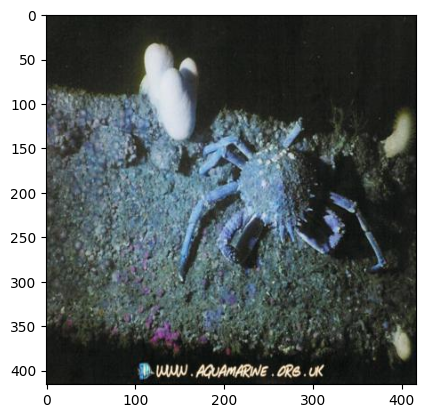

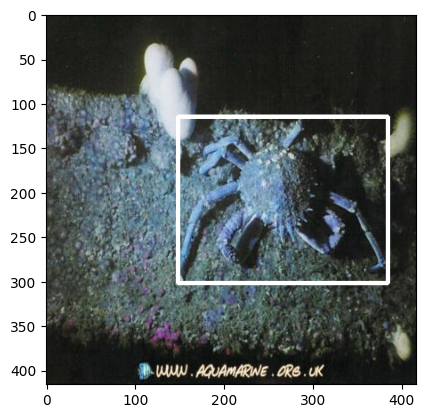

In [1]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout

df = pd.read_csv('../shellfish_dataset/train/_annotations.csv')
print(df.head())

print(df.iloc[0]) #print the first row of data
np_array = df.values
print(np_array)
print(len(np_array[0]))

# get a test first image
img = cv2.imread('../shellfish_dataset/train/d66fe3c0f7d5a396_jpg.rf.0d947e33ef400474603dc78f438e2101.jpg')
plt.imshow(img)

# draw a bounding box around the animal
# print(df[['xmin', 'xmax', 'ymin', 'ymax']])
# print(df[['xmin', 'xmax', 'ymin', 'ymax']].to_string(index=False))
print(df.loc[0, ['xmin', 'xmax', 'ymin', 'ymax']]) 
xmin = int(df.loc[0, 'xmin'])
xmax = int(df.loc[0, 'xmax'])
ymin = int(df.loc[0, 'ymin'])
ymax = int(df.loc[0, 'ymax'])
cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,255,255), 3)

# print(df.loc[0, 'filename']) #print the name of the corresponding image
plt.figure()
plt.imshow(img)

# 11/25 Progress

#Begin Creating Model